In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('D:/Documents/ml projects/PROJECT 1/datasets/PS_.csv')

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
df['type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: type
Non-Null Count    Dtype 
--------------    ----- 
6362620 non-null  object
dtypes: object(1)
memory usage: 48.5+ MB


In [27]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df['type_encoded'] = le.fit_transform(df['type'])

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [32]:
df['type_encoded'].unique()

array([3, 4, 1, 2, 0])

In [33]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], shape=(6353307,), dtype=object)

In [34]:
df_1 = df.drop(['type','nameOrig','nameDest'],axis = 'columns')

In [35]:
df_1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3


In [36]:
df_1['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_1.drop(['isFraud'],axis = 'columns')
y = df_1['isFraud']

In [39]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,1,181.00,181.0,0.00,0.0,0.0,0,4
3,1,181.00,181.0,0.00,21182.0,0.0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,3


In [40]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5090096, 8), (1272524, 8), (5090096,), (1272524,))

In [45]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1
)

In [46]:
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [47]:
model.score(X_train,y_train)

0.974080842483128

In [48]:
model.score(X_test,y_test)

0.9740987203384769

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_pred = model.predict(X_test)

In [52]:
cm = confusion_matrix(y_test,y_pred)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn

<function matplotlib.pyplot.show(close=None, block=None)>

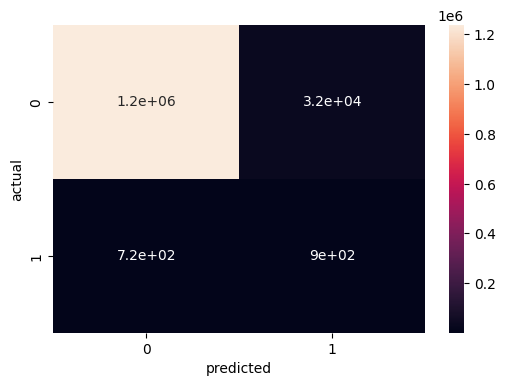

In [55]:
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show